<a href="https://colab.research.google.com/github/iamjatinjain/Deep-Learning_Convolutional-Neural-Network_Face-Mask-Detection/blob/main/Edge%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

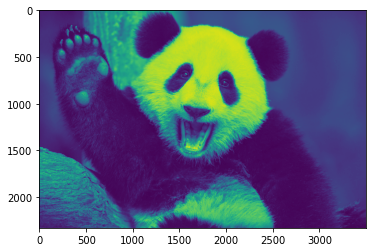

In [ ]:
img  = cv2.imread('/content/drive/MyDrive/ML/images/panda.png',0)
plt.imshow(img)

In [ ]:
sobel_x  = cv2.Sobel(img,-1,1,0,ksize=5)
sobel_y  = cv2.Sobel(img,-1,0,1,ksize=5)

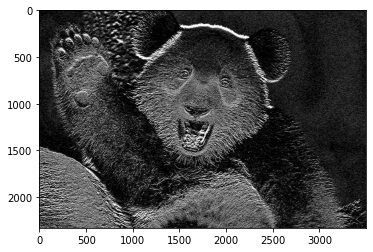

In [ ]:
plt.imshow(sobel_y, cmap ='gray')
plt.show()

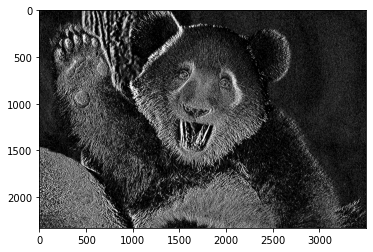

In [ ]:
plt.imshow(sobel_x, cmap='gray')
plt.show()

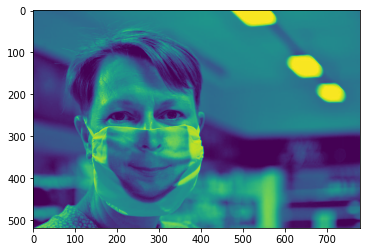

In [ ]:
img1  = cv2.imread('//content/drive/MyDrive/Computer Vision/3M.jpeg',0)
plt.imshow(img1)

In [ ]:
sobel_x  = cv2.Sobel(img1,-1,1,0,ksize=5)
sobel_y  = cv2.Sobel(img1,-1,0,1,ksize=5)

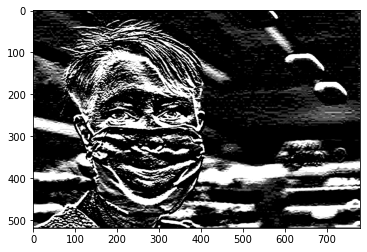

In [ ]:
plt.imshow(sobel_y, cmap ='gray')
plt.show()

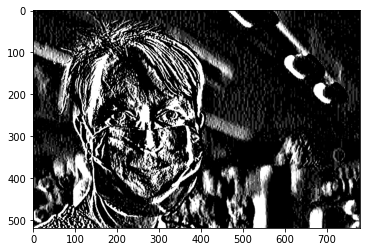

In [ ]:
plt.imshow(sobel_x, cmap='gray')
plt.show()

In [ ]:
def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))

    print("Kernel Shape : {}".format(kernel.shape))

    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()

    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    output = np.zeros(image.shape)

    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)

    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))

    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

    if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]

    print("Output Image size : {}".format(output.shape))

    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()

    return output

In [ ]:
def sobel_edge_detection(image, filter, verbose=False):
    new_image_x = convolution(image, filter, verbose)
 
    if verbose:
        plt.imshow(new_image_x, cmap='gray')
        plt.title("Horizontal Edge")
        plt.show()
 
    new_image_y = convolution(image, np.flip(filter.T, axis=0), verbose)
 
    if verbose:
        plt.imshow(new_image_y, cmap='gray')
        plt.title("Vertical Edge")
        plt.show()
 
    gradient_magnitude = np.sqrt(np.square(new_image_x) + np.square(new_image_y))
 
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
 
    if verbose:
        plt.imshow(gradient_magnitude, cmap='gray')
        plt.title("Gradient Magnitude")
        plt.show()
 
    return gradient_magnitude

In [ ]:
filters = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])


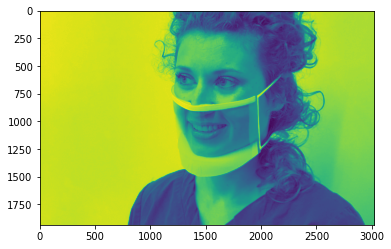

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Computer Vision/4M.jpg',0)
plt.imshow(image)

Image Shape : (1934, 3024)
Kernel Shape : (3, 3)
Output Image size : (1934, 3024)


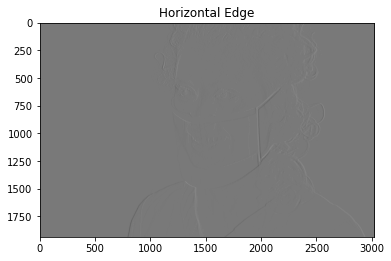

Image Shape : (1934, 3024)
Kernel Shape : (3, 3)
Output Image size : (1934, 3024)


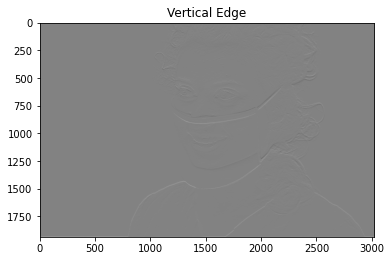

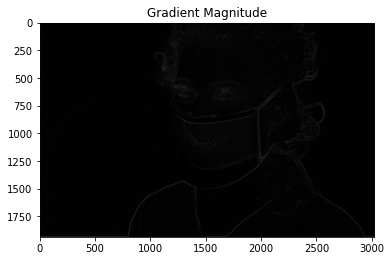

In [ ]:
sobelImage = sobel_edge_detection(image, filters, verbose=True)

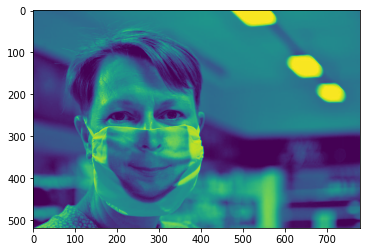

In [ ]:
plt.imshow(img1)

Image Shape : (519, 780)
Kernel Shape : (3, 3)
Output Image size : (519, 780)


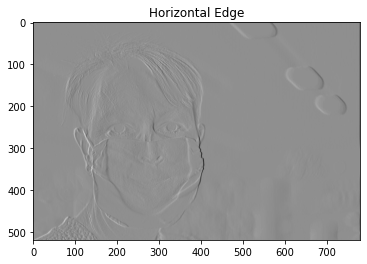

Image Shape : (519, 780)
Kernel Shape : (3, 3)
Output Image size : (519, 780)


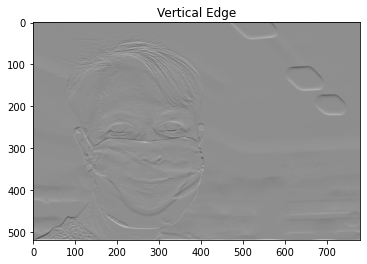

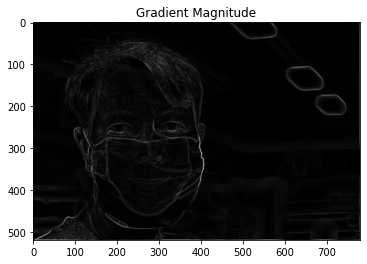

In [ ]:
sobelImage1 = sobel_edge_detection(img1, filters, verbose=True)

In [ ]:
sobel_x1  = cv2.Sobel(image,-1,1,0,ksize=5)
sobel_y1  = cv2.Sobel(image,-1,0,1,ksize=5)

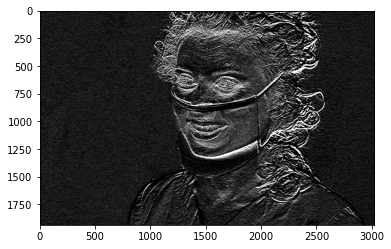

In [ ]:
plt.imshow(sobel_y1, cmap ='gray')
plt.show()

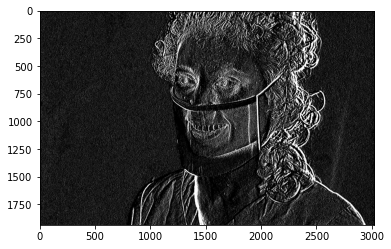

In [ ]:
plt.imshow(sobel_x1, cmap ='gray')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


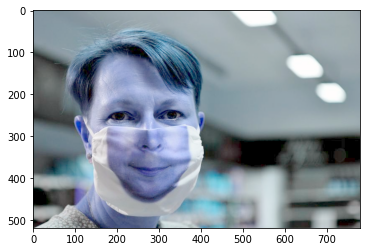

In [ ]:
import math,numpy
import scipy.misc
from PIL import Image

b = cv2.imread('//content/drive/MyDrive/Computer Vision/3M.jpeg')
#b = cv2.imread(a)

gamma = 0.5

b1 =  b.astype(float)
b3 = numpy.max(b1)

b2 = b1/b3

b3 = numpy.log(b2)*gamma
c = numpy.exp(b3)*255.0

d = c.astype(int)
#d = scipy.misc.toimage(c1)
plt.imshow(d)


In [ ]:
def imageHist(image):
    hist,bins = np.histogram(image.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    return cdf_normalized, hist, bins

def imageEqualize(image,cdf):
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*256/(cdf_m.max()-cdf_m.min())
    cdf_out = np.ma.filled(cdf_m,0)#.astype('uint8')
    return cdf_out[image]

In [ ]:
C = np.array(image)
#def imageHist(image):
hist,bins = np.histogram(image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
imgEQL = imageEqualize(np.copy(C),cdf_normalized)
cdf_normalized,hist,bins = imageHist(np.copy(imgEQL))

plt.plot(cdf_normalized, color = 'b')
plt.hist(imgEQL.flatten(),256,[0,256],color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Equalized Color Image')
plt.show()

TypeError: ignored

In [ ]:
def imageGray(image):
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    grayScale = 0.2989*R + 0.5870*G + 0.1140*B
    #grayScale = np.stack((0.2989*R, 0.5870*G, 0.1140*B),axis=2)

In [ ]:
grayImage = imageGray(np.copy(C))
plt.imshow(grayImage,cmap='gray')

IndexError: ignored

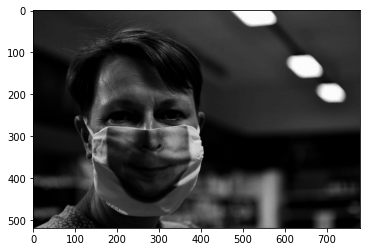

In [ ]:
from PIL import Image
from pylab import *

im = array(Image.open('//content/drive/MyDrive/Computer Vision/3M.jpeg').convert('L'))
gray()
im2 = 255 -im       #negative image
im3 = (100.0/255) *im + 100 # Clamp to interval 100 ... 200
im4 = 255.0 *(im/255.0)**2

plt.imshow(im4)

plt.show();

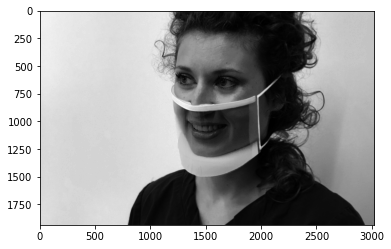

In [ ]:
im = array(Image.open('/content/drive/MyDrive/Computer Vision/4M.jpg').convert('L'))
gray()
im2 = 255 -im       #negative image
im3 = (100.0/255) *im + 100 # Clamp to interval 100 ... 200
im4 = 255.0 *(im/255.0)**2

plt.imshow(im4)

plt.show();